# Generic Content Analysis


## ⚠️ PLEASE READ BEFORE DOING ANYTHING ⚠️

Welcome to this online coding environment ! 
You are currently running a *Jupyter notebook* that we hope to be usefull for content analysis of questionnaires. 

>Each cell can be ran individually (pressing the "Play" ▶ button or pressing CTRL+ENTER in the each cell). In order to make everything run smoothly, it is **strongly** recommended to run them in order. 

>***RECOMMANDED:*** You can also run all the cells at the same time : "Run" → "Run All Cells".<br>
> ⚠️ If you choose this option and want to analyse your own data, we suggest that you configure correctly the `experiment`, `import_file` and `references` variables before running all the cells once, then adjust the `max_radius` variable of Figure 4. 

At the end of the execution, you will have the opportunity to save all yours results in an HTML file, executing `"File" → "Save and Export Notebook as" → "HTML"` 

If you have chosen to run every cell individually, please begin by running the following cell that imports all the required package for our code to work correctly ↓

In [1]:
%%capture
######### IMPORTS #########
import pandas as pd
import numpy as np 
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import normalize
from scipy.stats import spearmanr

import plotly.express as px
import plotly.graph_objects as go

from ipywidgets import Layout, FileUpload, Button, Box, VBox, HBox, Dropdown, Output, interactive_output, Checkbox, GridBox

from IPython.display import display
import asyncio
import io
from threading import Thread

from analysis_gui.forms import *
############################

############## GLOBALS ##############
# TYPE_XSL = "application/vnd.ms-excel"
# TYPE_XLSX = "application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"

# df = None
# experiment = ""
#####################################

#Required package to download the image
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

---
# Data import

By default, this repository is configured to make you compute your own results (`experiment = "Custom"`), but we also configured it to reproduce some previous analyses:

* option `experiment = "Gauld2023_OSAS_content_analysis"` : Gauld C, Baillieul S, Martin VP, Richaud A, Pelou M, Abi-Saab P,Coelho J, Philip P, Pépin JL, Micoulaud-Franchi JA. 
What evaluate obstructive sleep apnea patient-based screening questionnaires? A systematic and quantified item content analysis. *Under review* 

* option `experiment = "Gauld2023_sleep_content_analysis"`: 
 Gauld C, Martin VP, Richaud A, Bailleul S, Lucie V, Perromat JL, Zreik I, Taillard J, Geoffroy PA, Lopez R, Micoulaud-Franchi JA. Systematic Item Content and Overlap Analysis of Self-reported Multiple Sleep Disorders Screening Questionnaires in Adults. *Journal of Clinical Medicine*. [https://doi.org/10.3390/jcm12030852](https://doi.org/10.3390/jcm12030852) 

* option `experiment = "Fried2017"` : Fried EI. The 52 symptoms of major depression: Lack of content overlap among seven common depression scales. *Journal of Affective Disorders*. 2017 Jan;208:191–7. 


## Correct symptom file formatting

For this notebook to work correcly, your symptom file should be formatted the following way : 
* the four first columns must be the category (named "Category" in our example), subcategory (named "Subcategory" in our example), the abbreviation for the symptom (as shown in the Figure, named "Ab" in our example) and the name of the symptom ("Symptom" in our example);
* the other columns are the different questionnaires, while the line are the different symptoms.
* For each questionnaire, the symptoms are coded the following way: 
    * 0: The symptom is absent from this questionnaire
    * 1: The symptom is specific in this questionnaire (i.e. the symptom has bene identified in an item mentionning only one symptom)
    * 2: The symptom is componed in this questionnaire (i.e. the symptom has bene identified in an item mentionning at least two symptom)

⚠️ If you do not have categories or subcategories, just put empty columns as first or second columns ⚠️

## Importing data by uploading an excel file 

To import your own excel spreadsheet: 
>* Select "Custom" from the dropdown menu below 
>* Click on the "Upload" button ⭱
>* Click the "Confirm" button ✓

This program only accepts `.xsl` and `.xlsx` file formats (excel documents)

In [2]:
file_selection = FileSelectionForm()
display(file_selection)

FileSelectionForm(children=(HBox(children=(Dropdown(description='Expérience', index=1, options=('Fried2017', '…

## Reference classifications
In the `Gauld2023_sleep_content_analysis` paper, we compare the symptoms of the questionnaires with two references classification (ICSD and DSM). If you have reference columns that you want to compare with but you do not want to compute metrics on, please put them in this table. Otherwise, just let this list empty [ ].

⚠️ the name of the references should match PERFECTLY the name of the columns they are in (including uppercases and lowercases, or spaces) ⚠️

# Ordering questionnaires and symptoms

First, the questionnaires are classified from having the higher number of symptoms to the lowest.

In [3]:
ref_selection = ReferenceSelectionForm()
file_selection.chain(ref_selection)
display(ref_selection)

ReferenceSelectionForm(layout=Layout(align_items='flex-start', grid_gap='10px', overflow='visible', width='max…

---
# 1. Analysis of the number and frequency of symptoms

In a first step, we analyse the frequency of the symptoms.

## Histogram of number of symptoms

### Sorted by number of occurences or category

In [4]:
histo = HistogramUI()
ref_selection.chain(histo)
display(histo)

HistogramUI(layout=Layout(grid_gap='20px'))

## Number of symptoms by questionnaire

In [6]:
sympt_per_questionnaire = pd.DataFrame(np.zeros((common.df.shape[1]-5,3)), index = common.df.iloc[:,4:-1].columns, columns = ['Specific symptoms', 'Compound symptoms', 'Total'])
sympt_per_questionnaire['Specific symptoms'] = (common.df.iloc[:,4:-1]==1).sum(axis = 0)
sympt_per_questionnaire['Compound symptoms'] = (common.df.iloc[:,4:-1]==2).sum(axis = 0)
sympt_per_questionnaire['Total'] = (common.df.iloc[:,4:-1]>=1).sum(axis = 0)
sympt_per_questionnaire.to_excel("table1_symptomes_per_questionnaire.xlsx")

display(sympt_per_questionnaire)

,Specific symptoms,Compound symptoms,Total
ASA,9,4,13
SA-SDQ,10,1,11
STOP-Bang,7,2,9
Berlin,8,1,9
Haraldsson,3,4,7
NoSAS,5,0,5
STOP,3,2,5
GOAL,4,0,4
OSA 50,4,0,4
AS,2,2,4


The table has been save in the online folder (📁 symbol on the left) under the name [table1_symptoms_per_questionnaire.xlsx](./table1_symptoms_per_questionnaire.xlsx). <br>You can change the name and the format of the file changing the name in the `sympt_per_questionnaire.to_excel()` function. 
<br>⚠️ If you need it, save the excel file on your local computer : these online file will be deleted as soon as you quit this page!

## Symptoms that are in classifications but not in questionnaires

In [7]:
if len(common.references) > 0 :
  for ref in common.references: 
    print("---", ref, "---")
    for symptom in common.df.Symptom.unique() : 
      if (int(common.df.loc[common.df.Symptom == symptom,ref]) == 1 and int(common.df.loc[common.df.Symptom == symptom, 'sum_symptoms'])==0) : 
        print(symptom)
else : 
    print("References list is empty")

--- Berlin ---
--- Wisconsin Q ---


## Number of symptoms in each category for each questionnaire

In [8]:
# number of categories/questionnaire
if common.df.shape[0] != common.df['Category'].isnull().sum() : 
  cat_per_questionnaire = pd.DataFrame(np.zeros((common.df.shape[1]-5,len(common.df.Category.unique()))), index = common.df.iloc[:,4:-1].columns, columns = common.df.sort_values(by="Ab").Category.unique())
  for category in common.df.Category.unique():
    cat_per_questionnaire.loc[:,category] = (common.df[common.df.Category==category].iloc[:,4:-1]>=1).sum(axis = 0)
  display(cat_per_questionnaire.T)
  cat_per_questionnaire.T.to_excel("table2_categorie_per_questionnaire.xlsx")
else : 
  print('No category in this dataframe !')

,ASA,SA-SDQ,STOP-Bang,Berlin,Haraldsson,NoSAS,STOP,GOAL,OSA 50,AS,Wisconsin Q
OSA symptoms,4,6,2,4,2,1,2,1,2,3,3
Sleep-related symptoms,4,1,2,3,5,0,2,0,0,0,0
Clinical characteristics,5,4,5,2,0,4,1,3,2,1,0


The table has been save in the online folder (📁 symbol on the left) under the name [table2_categorie_per_questionnaire.xlsx](./table2_categorie_per_questionnaire.xlsx). <br>You can change the name and the format of the file changing the name in the `cat_per_questionnaire.T.to_excel()` function. 
<br>⚠️ If you need it, save the excel file on your local computer : these online file will be deleted as soon as you quit this page!

## Distribution across the categories of the symptoms measured by each questionnaire
(i.e. same thing as before, but normalized by questionnaire (sum across lines equals 1)).

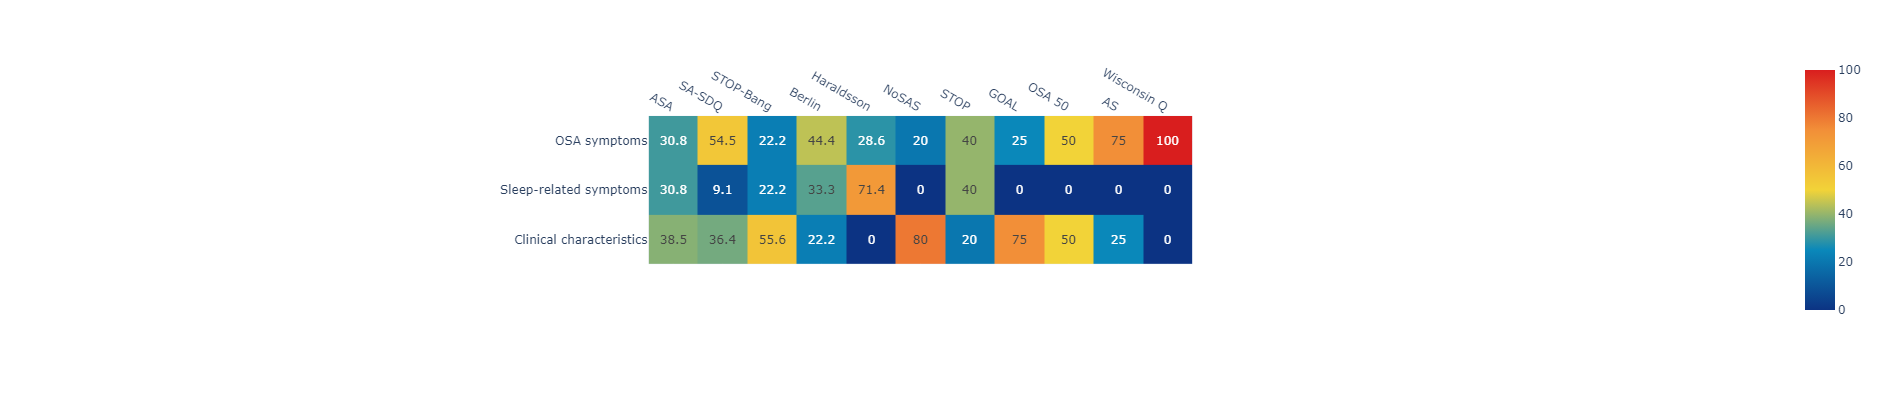

In [9]:
if common.df.shape[0] != common.df['Category'].isnull().sum() : 
  fig = px.imshow(pd.DataFrame(np.round(normalize(cat_per_questionnaire,norm='l1').T*100,1), # for printing text, we round the percentages to 1 decimal
                              columns = cat_per_questionnaire.index,
                              index= cat_per_questionnaire.columns),
                  text_auto=True, # add the text
                  color_continuous_scale= 'Portland'# more color palettes available here : https://plotly.com/python/builtin-colorscales/
  )
  fig.update_xaxes(side="top") # xaxis on top of the figure
  fig.update_layout(
    autosize=False,
    width=800,
    height=400
    )
  #fig.write_image("figure3_heatmap.pdf") # writing the figure in a file
  fig.show() # showing the figure
else : 
  print('No category in this dataframe !')

Figure 3 has been save in the online folder (📁 symbol on the left) under the name [figure3_heatmap.pdf](figure3_heatmap.pdf). You can change the name and the format of the file changing the name in the `#fig.write_image()` function. 
<br>⚠️ If you need it, save the figure on your local computer : these online file will be deleted as soon as you quit this page!

---
# 2. Analysis and data vizualisation of content analysis Figure

## Changing shape of data

In [10]:
# changing the shape of data
df_col = common.df.melt(id_vars=['Category','Subcategory','Ab', 'Symptom'], value_vars=common.col).copy()
df_col.head()

,Category,Subcategory,Ab,Symptom,variable,value
0,OSA symptoms,Breath abnormalities observations,S006,Stop breathing observations,ASA,1
1,OSA symptoms,Snoring,S002,Loud Snoring,ASA,1
2,OSA symptoms,Snoring,S001,Snoring,ASA,1
3,Clinical characteristics,Anthropometric,S020,BMI,ASA,1
4,Sleep-related symptoms,Sleepiness,S010,Fatigue,ASA,2


## Content Analysis Figure

If you want to analyse custom data, you will have to set the variable `max_radius` so that the figure have the desired look !

In [5]:
circle = CircleForm()
ref_selection.chain(circle)
display(circle)

CircleForm(layout=Layout(align_items='flex-start', grid_gap='10px', overflow='visible', width='max-content'))

The figure has been save in the online folder (📁 symbol on the left) under the name [figure4_radial.pdf](figure4_radial.pdf). You can change the name and the format of the file changing the name in the `#fig.write_image()` function. 
<br>⚠️ If you need it, save the figure on your local computer : these online file will be deleted as soon as you quit this page!

## Overlap between questionnaires - Jaccard Index

In order to estimate the overlap between the symptoms measured by the questionnes, calculate the Jaccard index, which is defined as the number of symmtoms that are measured by both questionnaires, divided by the number of unique symptoms measured both questionnaires.

### Jaccard index of symptom for each pair of questionnaire
First, we compute the Jaccard index for each pair of questionnaires and plot it using a heatmap.

In [11]:
###
# Computing the table
###
jaccard_table = pd.DataFrame(np.zeros((common.df.shape[1]-5,common.df.shape[1]-5)), index = common.df.columns[4:-1], columns = common.df.columns[4:-1]) # df.columns[3:-1] : questionnaires without header
for questionnaire1 in common.df.columns[4:-1] : 
  for questionnaire2 in common.df.columns[4:-1] : 
    jaccard_table.loc[questionnaire1, questionnaire2] = jaccard_score(common.df[questionnaire1]>=1, common.df[questionnaire2]>=1)
    
display(jaccard_table)
jaccard_table.to_excel("table3_jaccard_pairs.xlsx")

,ASA,SA-SDQ,STOP-Bang,Berlin,Haraldsson,NoSAS,STOP,GOAL,OSA 50,AS,Wisconsin Q
ASA,1.000000,0.263158,0.375000,0.375000,0.333333,0.200000,0.285714,0.133333,0.062500,0.307692,0.230769
SA-SDQ,0.263158,1.000000,0.333333,0.250000,0.125000,0.142857,0.230769,0.250000,0.153846,0.153846,0.166667
STOP-Bang,0.375000,0.333333,1.000000,0.384615,0.230769,0.400000,0.555556,0.444444,0.181818,0.181818,0.200000
Berlin,0.375000,0.250000,0.384615,1.000000,0.230769,0.166667,0.400000,0.181818,0.181818,0.300000,0.333333
Haraldsson,0.333333,0.125000,0.230769,0.230769,1.000000,0.090909,0.333333,0.000000,0.100000,0.222222,0.250000
NoSAS,0.200000,0.142857,0.400000,0.166667,0.090909,1.000000,0.000000,0.500000,0.125000,0.125000,0.142857
STOP,0.285714,0.230769,0.555556,0.400000,0.333333,0.000000,1.000000,0.125000,0.125000,0.285714,0.333333
GOAL,0.133333,0.250000,0.444444,0.181818,0.000000,0.500000,0.125000,1.000000,0.142857,0.142857,0.166667
OSA 50,0.062500,0.153846,0.181818,0.181818,0.100000,0.125000,0.125000,0.142857,1.000000,0.142857,0.166667
AS,0.307692,0.153846,0.181818,0.300000,0.222222,0.125000,0.285714,0.142857,0.142857,1.000000,0.750000


Table 3 has been save in the online folder (📁 symbol on the left) under the name [table3_jaccard_pairs.xlsx](./table3_jaccard_pairs.xlsx). <br>You can change the name and the format of the file changing the name in the `jaccard_table.to_excel()` function. 
<br>⚠️ If you need it, save the excel file on your local computer : these online file will be deleted as soon as you quit this page!

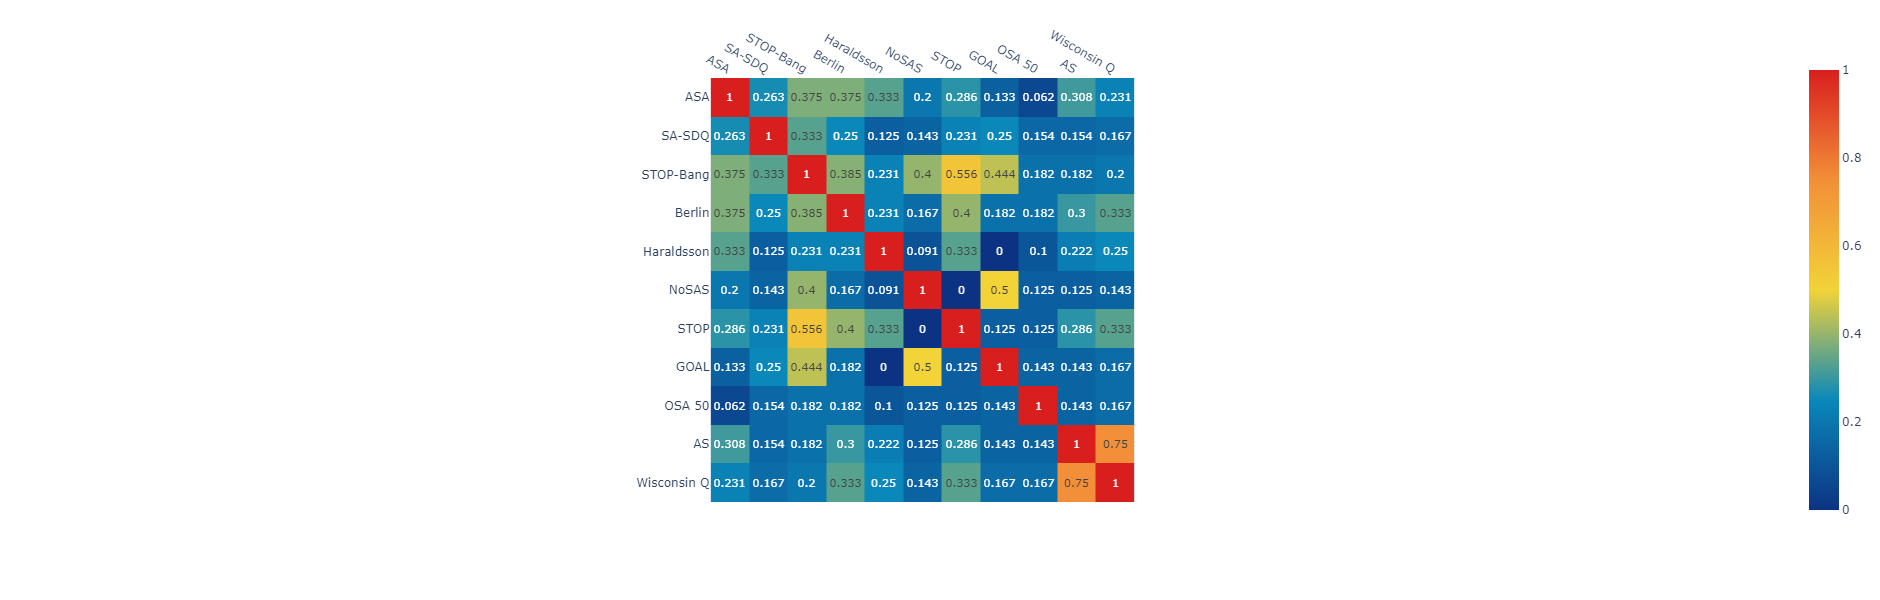

In [12]:
###
# Plotting it as a heatmap
###
fig = px.imshow(pd.DataFrame(np.round(jaccard_table,3), # rounding values for the plot
                             index = jaccard_table.index,
                             columns= jaccard_table.columns),
                text_auto=True, # annotating values in the plot
                color_continuous_scale= 'Portland'# more color palettes available here : https://plotly.com/python/builtin-colorscales/
)
fig.update_xaxes(side="top")
fig.update_layout(
    autosize=False,
    width=600,
    height=600
    )
#fig.write_image("figure5_heatmap_jaccard.pdf") # writting the figure into a file
fig.show() # showing figure

The figure has been save in the online folder (📁 symbol on the left) under the name [figure5_heatmap_jaccard.pdf](figure5_heatmap_jaccard.pdf). <br>You can change the name and the format of the file changing the name in the `#fig.write_image()` function. 
<br>⚠️ If you want it, save the figure on your local computer : these online file will be deleted as soon as you quit this page!

### Avg. Jaccard index
Then, we compute the average of Jaccard index for each questionnaire with other questionnaires (excluding the references). 

In [13]:
jaccard = pd.DataFrame(np.zeros((len(common.df.drop(common.header+['sum_symptoms'],axis = 1).columns),1)), index = common.df.drop(common.header+['sum_symptoms'],axis = 1).columns, columns=['Avg. Jaccard Index'])
for questionnaire in common.df.drop(common.header+['sum_symptoms'], axis=1).columns : 
  jaccard.loc[questionnaire, 'Avg. Jaccard Index'] = jaccard_table.drop(common.references+[questionnaire], axis = 1).loc[questionnaire, :].mean()
display(jaccard)
jaccard.to_excel("table4_jaccard_average_questionnaires.xlsx")
print("Average Jaccard index (wo references): "+str(np.round(float(jaccard.mean()),5)) +" (sd: "+str(np.round(float(jaccard.std()),4))+ ")" )


,Avg. Jaccard Index
ASA,0.245091
SA-SDQ,0.206601
STOP-Bang,0.337842
Berlin,0.274521
Haraldsson,0.179446
NoSAS,0.197971
STOP,0.242636
GOAL,0.217312
OSA 50,0.129235
AS,0.195251


Average Jaccard index (wo references): 0.22667 (sd: 0.0556)


Table 4 has been save in the online folder (📁 symbol on the left) under the name [table4_jaccard_average_questionnaires.xlsx](./table4_jaccard_average_questionnaires.xlsx). <br>You can change the name and the format of the file changing the name in the `jaccard.to_excel()` function. 
<br>⚠️ If you need it, save the excel file on your local computer : these online file will be deleted as soon as you quit this page!

### Correlation between the number of symptoms and the average Jacquart index for each questionnaire 

In [14]:
correlations = jaccard.join(sympt_per_questionnaire)
display(correlations)
print("Correlation between Jaccard Index and number of specific symptoms: ",spearmanr(correlations['Avg. Jaccard Index'], correlations['Specific symptoms']))
print("Correlation between Jaccard Index and number of compound symptoms: ",spearmanr(correlations['Avg. Jaccard Index'], correlations['Compound symptoms']))
print("Correlation between Jaccard Index and total number of symptoms: ",spearmanr(correlations['Avg. Jaccard Index'], correlations['Total']))

,Avg. Jaccard Index,Specific symptoms,Compound symptoms,Total
ASA,0.245091,9,4,13
SA-SDQ,0.206601,10,1,11
STOP-Bang,0.337842,7,2,9
Berlin,0.274521,8,1,9
Haraldsson,0.179446,3,4,7
NoSAS,0.197971,5,0,5
STOP,0.242636,3,2,5
GOAL,0.217312,4,0,4
OSA 50,0.129235,4,0,4
AS,0.195251,2,2,4


Correlation between Jaccard Index and number of specific symptoms:  SpearmanrResult(correlation=0.3724383967960793, pvalue=0.259324499813798)
Correlation between Jaccard Index and number of compound symptoms:  SpearmanrResult(correlation=0.08968652080586162, pvalue=0.7931387300586465)
Correlation between Jaccard Index and total number of symptoms:  SpearmanrResult(correlation=0.3133940058276483, pvalue=0.3480151019953285)


### Jaccard index of symptoms for each pair of questionnaire for each category

Computing the same metric (average of average) for each category of questionnaires.

In [15]:
if common.df.shape[0] != common.df['Category'].isnull().sum() : 
  res = pd.DataFrame(np.zeros((len(common.df.Category.unique()),1)), index = common.df.sort_values(by="Ab").Category.unique(), columns=['Avg. Jaccard Index'])
  for category in common.df.Category.unique() : 
      df_category = common.df.drop(common.header+['sum_symptoms'],axis = 1)[common.df.Category==category]
      df_category = df_category.iloc[:,(df_category.sum(axis = 0)!=0.0).to_numpy()] # we keep only the questionnaire with at least 1 symptom
      liste_avg = []
      for questionnaire1 in df_category.columns : 
        liste = []
        for questionnaire2 in df_category.columns : 
          if questionnaire1!= questionnaire2 :
            liste.append(jaccard_score(df_category[questionnaire1]>=1, df_category[questionnaire2]>=1))
        liste_avg.append(np.mean(liste))
      res.loc[category, 'Avg. Jaccard Index'] = np.mean(liste_avg)
  display(res)
  res.to_excel("table5_jaccard_categories.xlsx")

else : 
  print("Category is empty")

,Avg. Jaccard Index
OSA symptoms,0.393983
Sleep-related symptoms,0.319524
Clinical characteristics,0.213062


Table 5 has been save in the online folder (📁 symbol on the left) under the name [table5_jaccard_categories.xlsx](./table5_jaccard_categories.xlsx). <br>You can change the name and the format of the file changing the name in the `res.to_excel()` function. 
<br>⚠️ If you need it, save the excel file on your local computer : these online file will be deleted as soon as you quit this page!

Computing the same metric (average of average) for each subcategory.

In [16]:
if common.df.shape[0] != common.df['Subcategory'].isnull().sum() : 
  res = pd.DataFrame(np.zeros((len(common.df.Subcategory.unique()),1)), index = common.df.sort_values(by="Ab").Subcategory.unique(), columns=['Avg. Jaccard Index'])
  for subcategory in common.df.Subcategory.unique() : 
      df_subcategory = common.df.drop(common.header+['sum_symptoms'],axis = 1)[common.df.Subcategory==subcategory]
      df_subcategory = df_subcategory.iloc[:,(df_subcategory.sum(axis = 0)!=0.0).to_numpy()] # we keep only the questionnaire with at least 1 symptom
      liste_avg = []
      for questionnaire1 in df_subcategory.columns : 
        liste = []
        for questionnaire2 in df_subcategory.columns : 
          if questionnaire1!= questionnaire2 :
            liste.append(jaccard_score(df_subcategory[questionnaire1]>=1, df_subcategory[questionnaire2]>=1))
        liste_avg.append(np.mean(liste))
      res.loc[subcategory, 'Avg. Jaccard Index'] = np.mean(liste_avg)
  display(res)
  res.to_excel("table5b_jaccard_subcategories.xlsx")

else : 
  print("Subcategory is empty")

D:\Users\Alexandre\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

D:\Users\Alexandre\anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

D:\Users\Alexandre\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

D:\Users\Alexandre\anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



,Avg. Jaccard Index
Snoring,0.555556
Breath abnormalities-related complaints,0.250000
Breath abnormalities observations,1.000000
Context,NaN
Sleepiness,0.625000
Awakening,1.000000
Insomnia,NaN
Sociodemographic,0.700000
Anthropometric,0.500000
Comorbidity,0.750000


# Sunburst Plot

In [17]:
#replacing some wordings
if common.experiment == "Gauld2023_OSAS_content_analysis" : 
    common.df.replace("Stop breathing observations","Stop breathing <br> observations", inplace = True)
    common.df.replace("Self-complaints of breath abnormalities","Self-complaints of <br> breath abnormalities", inplace = True)
    common.df.replace("Breath abnormalities complaints reported by other","Breath abnormalities <br> complaints reported <br> by other", inplace = True)
    common.df.replace("Sociodemographic","Sociodem.", inplace = True)
    common.df.replace("Anthropometry","Antropo.", inplace = True)
    common.df.replace("Sleep-related symptoms","Sleep-related <br> symptoms", inplace = True)
    common.df.replace("Breath abnormalities complaints","Breath abn. compl.", inplace = True)
    common.df.replace("OSA symptoms","OSA <br> symptoms", inplace = True)
    common.df.replace("Clinical characteristics","Clinical <br> characteristics", inplace = True)
    common.df.replace("Breath abnormalities observations","Breath <br> abnormalities <br> observations", inplace = True)
    common.df.replace("Breath abnormalities-related complaints","Breath <br> abnormalities-related <br> complaints", inplace = True)

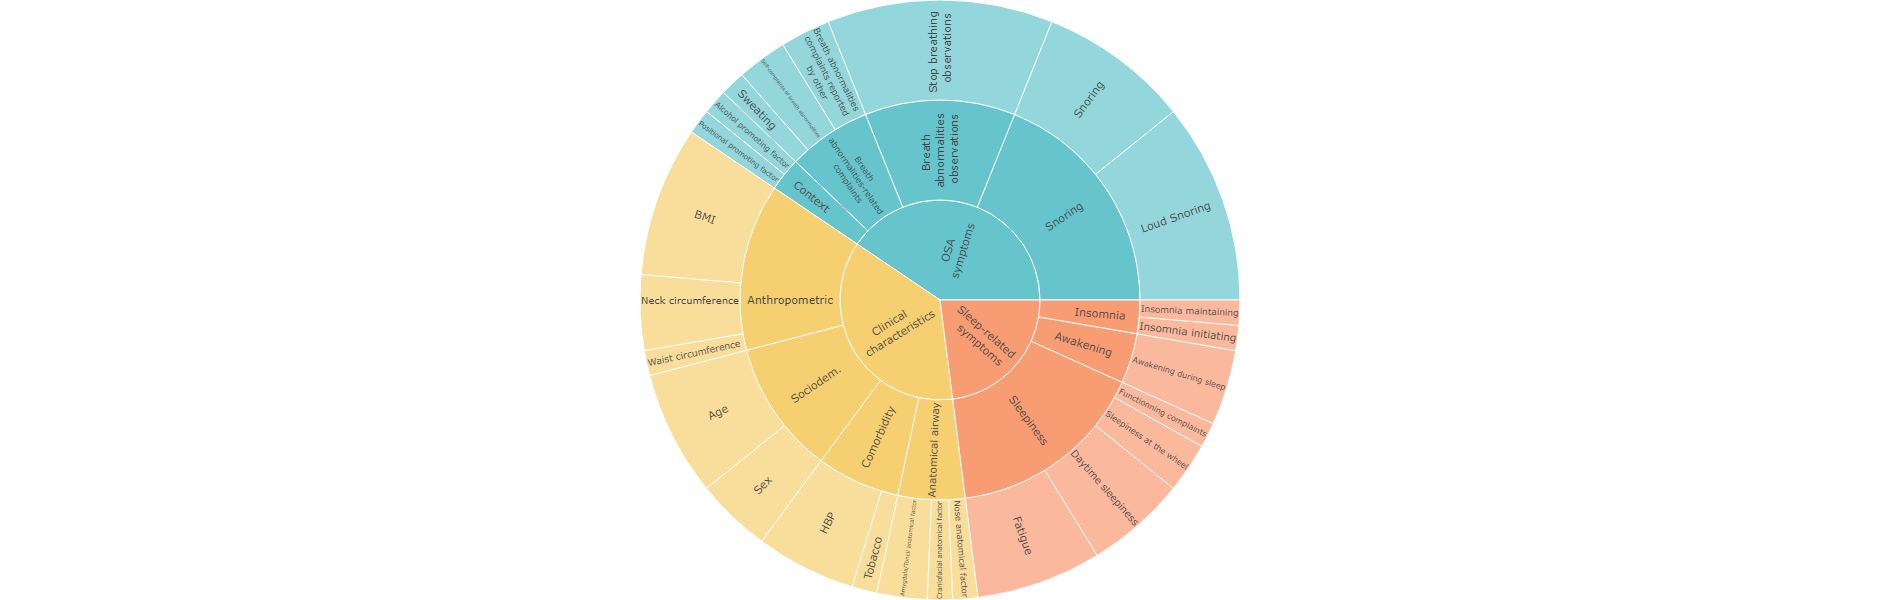

In [18]:
if np.sum(common.df.Subcategory.isna()) != common.df.shape[0] : # with category and subcategory
    fig = px.sunburst(common.df, path=['Category', 'Subcategory', 'Symptom'], values='sum_symptoms',color_discrete_sequence = px.colors.qualitative.Pastel)
    fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), font_size=11, width =600, height = 600)
    fig.update_traces(insidetextorientation='radial')
    fig.update_traces(hovertemplate='sum_symptom: %{value}')
    #fig.write_image("figure6_sunburst_plot.pdf") # writting the figure into a file
    fig.show()
elif np.sum(common.df.Category.isna()) != common.df.shape[0] : # with category only
    fig = px.sunburst(common.df, path=['Category', 'Symptom'], values='sum_symptoms',color_discrete_sequence = px.colors.qualitative.Pastel)
    fig.update_layout(margin = dict(t=0, l=0, r=0, b=0), font_size=11, width =600, height = 600)
    fig.update_traces(insidetextorientation='radial')
    fig.update_traces(hovertemplate='sum_symptom: %{value}')
    #fig.write_image("figure6_sunburst_plot.pdf") # writting the figure into a file
    fig.show()
else : 
    print("No category -> no sunburst plot")


The figure has been save in the online folder (📁 symbol on the left) under the name [figure6_sunburst_plot.pdf](figure6_sunburst_plot.pdf). <br>You can change the name and the format of the file changing the name in the `#fig.write_image()` function. 
<br>⚠️ If you want it, save the figure on your local computer : these online file will be deleted as soon as you quit this page!

---
# Export to html
You have reached the end of this notebook. 
If you want to save the whole page, you can download it to html with dynamic figures:
>* "File" → "Save and Export Notebook as" → "HTML" 